In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, optimizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from keras.utils import image_dataset_from_directory

In [2]:
# import tensorflow as tf

print(tf.test.is_gpu_available())
print( tf.test.is_built_with_cuda())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [3]:
from math import floor
import random


image_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\RAVIKANT TIWARI\Desktop\3rd year project",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print(type(image_ds))
print(image_ds.class_names)
train_size=floor(len(image_ds)*.6)
val_size=floor(len(image_ds)*.2)
test_size=floor(len(image_ds)*.2)
print(test_size)
train_ds=image_ds.take(train_size)
val_ds=image_ds.skip(train_size).take(val_size)
test_ds=image_ds.skip(train_size+val_size).take(test_size)

Found 14293 files belonging to 163 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
['Person_1', 'Person_10', 'Person_100', 'Person_101', 'Person_102', 'Person_103', 'Person_104', 'Person_105', 'Person_106', 'Person_107', 'Person_108', 'Person_109', 'Person_11', 'Person_110', 'Person_111', 'Person_112', 'Person_113', 'Person_114', 'Person_115', 'Person_116', 'Person_117', 'Person_118', 'Person_119', 'Person_12', 'Person_120', 'Person_121', 'Person_122', 'Person_123', 'Person_124', 'Person_125', 'Person_126', 'Person_127', 'Person_128', 'Person_129', 'Person_13', 'Person_130', 'Person_131', 'Person_132', 'Person_133', 'Person_134', 'Person_135', 'Person_136', 'Person_137', 'Person_138', 'Person_139', 'Person_14', 'Person_140', 'Person_141', 'Person_142', 'Person_143', 'Person_144', 'Person_145', 'Person_146', 'Person_147', 'Person_148', 'Person_149', 'Person_15', 'Person_150', 'Person_151', 'Person_152', 'Person_153', 'Person_154', 'Person_155', 'Person_156', 'Pers

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)
test_ds=test_ds.map(process)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1,
          padding='same', activation='relu', input_shape=(256, 256, 3)))    
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))



model.add(Conv2D(filters=64, kernel_size=(
    3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Conv2D(filters=64, kernel_size=(
#     3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Conv2D(filters=64, kernel_size=(
#     3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Conv2D(filters=64, kernel_size=(
#     3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Conv2D(filters=64, kernel_size=(
#     3,3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(164, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

In [8]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   )
history = model.fit(train_ds,epochs=20,validation_data=val_ds,verbose=1,callbacks=es,)

Epoch 1/20
268/268 [==============================] - 81s 203ms/step - loss: 4.7011 - accuracy: 0.0546 - val_loss: 3.1206 - val_accuracy: 0.2669
Epoch 2/20
268/268 [==============================] - 48s 178ms/step - loss: 1.7429 - accuracy: 0.5447 - val_loss: 1.3114 - val_accuracy: 0.6541
Epoch 3/20
268/268 [==============================] - 48s 178ms/step - loss: 0.4647 - accuracy: 0.8649 - val_loss: 1.0523 - val_accuracy: 0.7405
Epoch 4/20
268/268 [==============================] - 45s 166ms/step - loss: 0.1396 - accuracy: 0.9597 - val_loss: 1.0134 - val_accuracy: 0.7630
Epoch 5/20
268/268 [==============================] - 45s 166ms/step - loss: 0.0815 - accuracy: 0.9778 - val_loss: 1.1125 - val_accuracy: 0.7602
Epoch 6/20
268/268 [==============================] - 44s 161ms/step - loss: 0.0540 - accuracy: 0.9845 - val_loss: 1.1529 - val_accuracy: 0.7598
Epoch 7/20
268/268 [==============================] - 44s 163ms/step - loss: 0.0719 - accuracy: 0.9791 - val_loss: 1.2238 - val_ac

In [13]:
scores = model.evaluate(test_ds,verbose=0)
print(int(scores[1]*100))

78


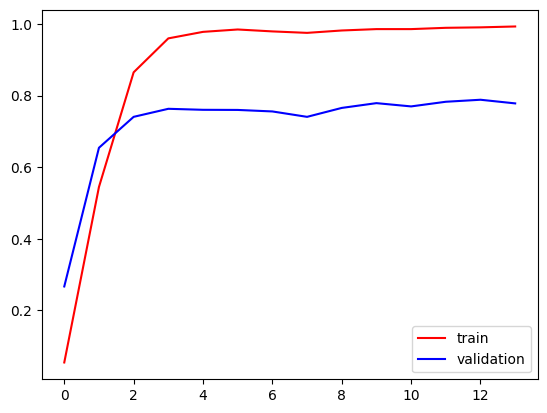

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.plot(history.history['test_accuracy'], color='green', label='test')
plt.legend()
plt.show()

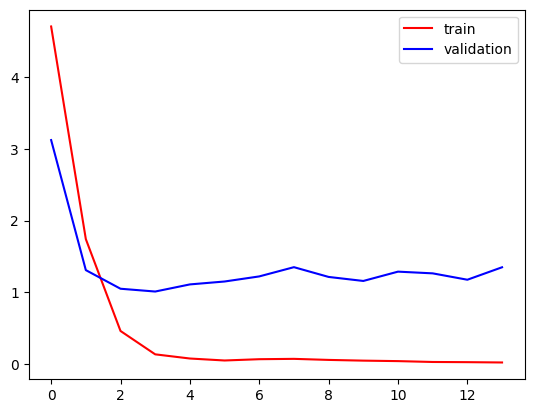

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()